In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"E:\Spark_Foundation\Student_Scoredata.txt",encoding='latin1')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [7]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
data.Hours.unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [10]:
data.groupby('Hours').Scores.value_counts()

Hours  Scores
1.1    17        1
1.5    20        1
1.9    24        1
2.5    21        1
       30        1
2.7    25        1
       30        1
3.2    27        1
3.3    42        1
3.5    30        1
3.8    35        1
4.5    41        1
4.8    54        1
5.1    47        1
5.5    60        1
5.9    62        1
6.1    67        1
6.9    76        1
7.4    69        1
7.7    85        1
7.8    86        1
8.3    81        1
8.5    75        1
8.9    95        1
9.2    88        1
Name: Scores, dtype: int64

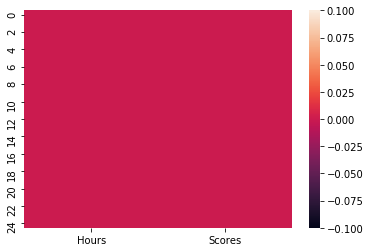

In [11]:
sns.heatmap(data.isna())

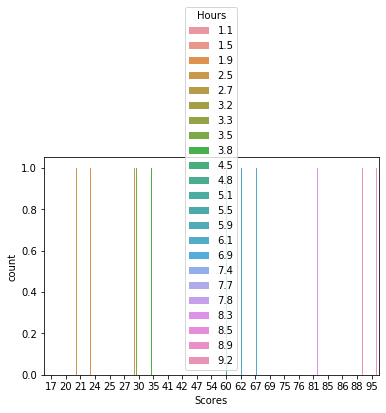

In [12]:
sns.countplot(x='Scores',hue='Hours',data=data)

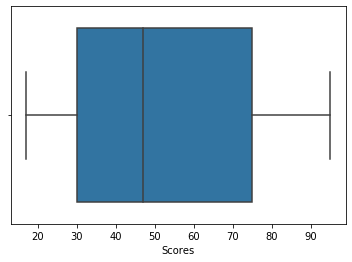

In [14]:
sns.boxplot(data.Scores)

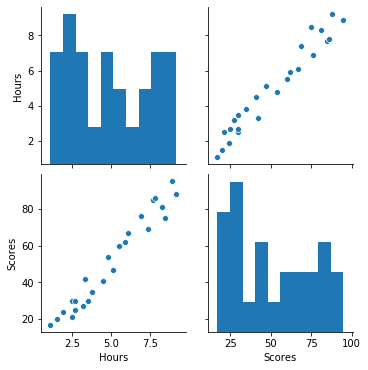

In [16]:

sns.pairplot(data)

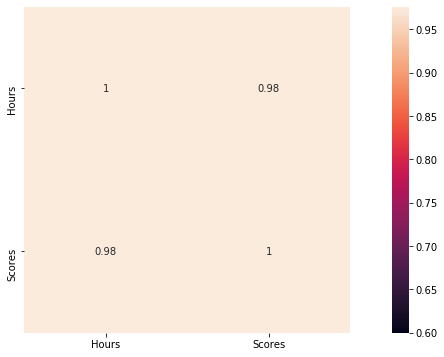

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(), vmax=0.6, square=True, annot=True)

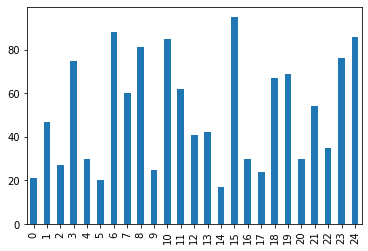

In [18]:
data[('Scores')].plot.bar()

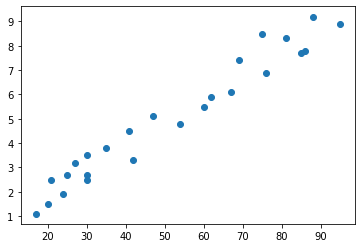

In [25]:
plt.scatter(x='Scores',y='Hours',data=data)

plt.show()

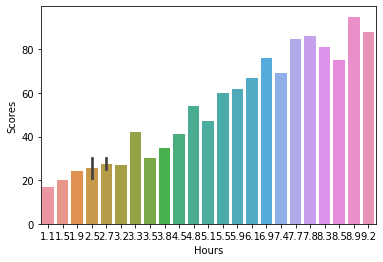

In [27]:
sns.barplot(x='Hours',y='Scores',data=data)

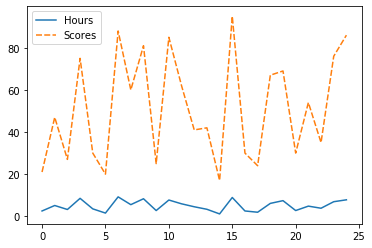

In [28]:
sns.lineplot(data=data)

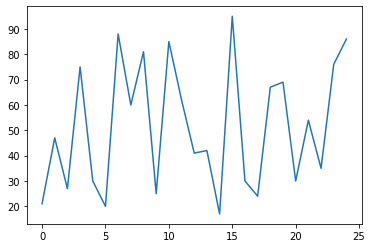

In [29]:
sns.lineplot(data=data.Scores)

# Train Test Split

In [41]:
Y=data.iloc[:,1].values
X=data.iloc[:,0].values

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(Y,X,test_size=0.2,random_state=1)

In [44]:
X_train=X_train.reshape(-1,1)
Y_train=Y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)

# Model Building

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model=LinearRegression()

In [47]:
model.fit(X_train,Y_train)

LinearRegression()

In [49]:
prediction=model.predict(X_test)

In [50]:
prediction

array([[1.89921224],
       [4.20246922],
       [2.54412419],
       [7.24276843],
       [5.30803257]])

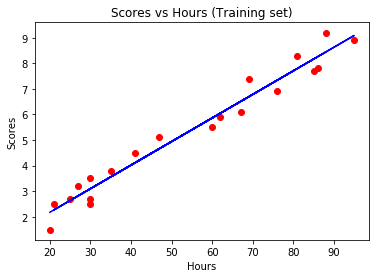

In [53]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Scores vs Hours (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [56]:
from sklearn.metrics import r2_score
Score=r2_score(Y_test,prediction)
Score

0.891512082407543

In [57]:
# print the coefficients
print(model.intercept_)
print(model.coef_)

[0.33299749]
[[0.09213028]]


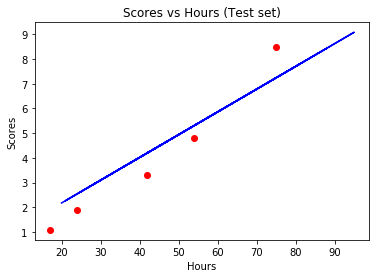

In [72]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Scores vs Hours (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()